**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

**Read CSV**

In [2]:
c = pd.read_csv('California housing.csv')

In [3]:
c.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,House Class
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,premium
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,premium
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,premium
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,premium
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,premium


In [4]:
c = c.drop(['longitude', 'latitude'], axis=1)

In [5]:
aa = c['median_house_value'].mean()
bb = c['median_house_value'].median()

print("Mean of median_house_value:", aa)
print("Median of median_house_value:", bb)

Mean of median_house_value: 206855.81690891474
Median of median_house_value: 179700.0


In [6]:
c['ocean_proximity'] = c['ocean_proximity'].astype('category')

In [7]:
c = c.rename(columns={'House Class': 'price_category'})

In [8]:
c.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,price_category
0,41,880,129.0,322,126,8.3252,452600,NEAR BAY,premium
1,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,premium
2,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,premium
3,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,premium
4,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,premium


**Visualizations**

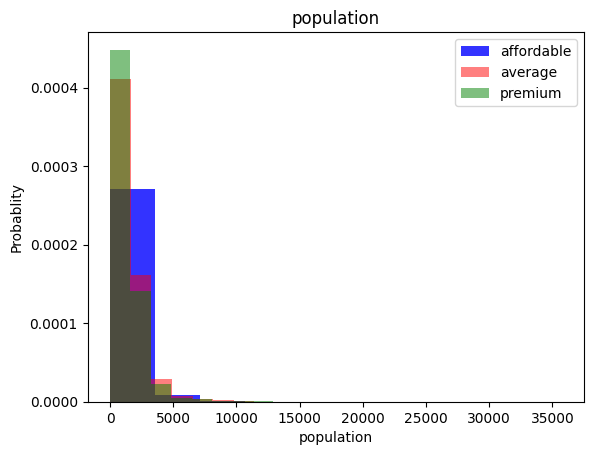

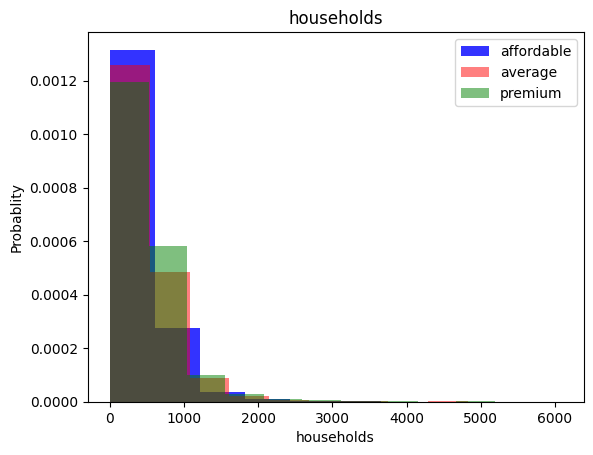

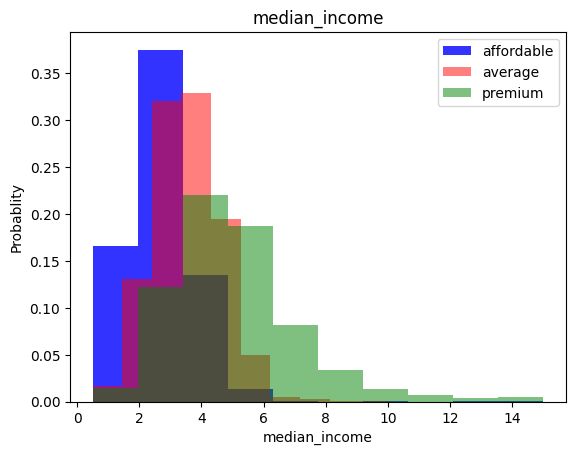

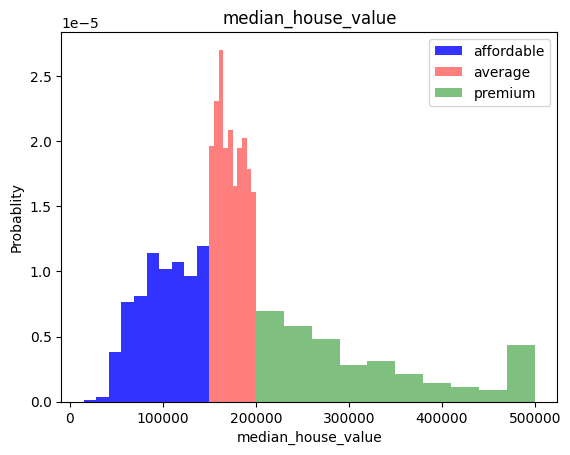

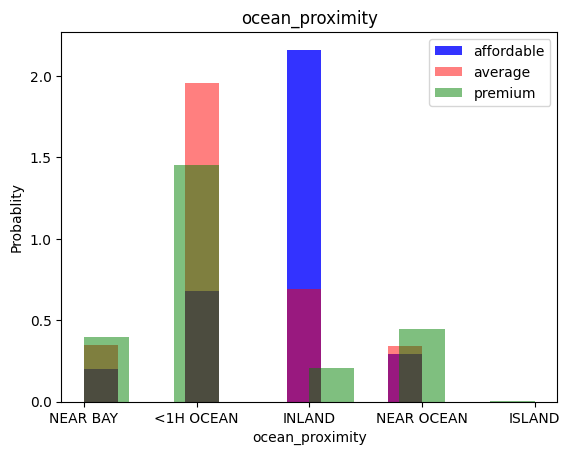

In [9]:
columns_taken = c.columns[3:-1]
for columns_to_plot in columns_taken:
  plt.hist(c[c['price_category'] == 'affordable'][columns_to_plot], color = 'blue', label = 'affordable', alpha = 0.8, density = True)
  plt.hist(c[c['price_category'] == 'average'][columns_to_plot], color = 'red', label = 'average', alpha = 0.5, density = True)
  plt.hist(c[c['price_category'] == 'premium'][columns_to_plot], color = 'green', label = 'premium', alpha = 0.5, density = True)  
  plt.title(columns_to_plot)
  plt.ylabel('Probablity')
  plt.xlabel(columns_to_plot)
  plt.legend()
  plt.show()

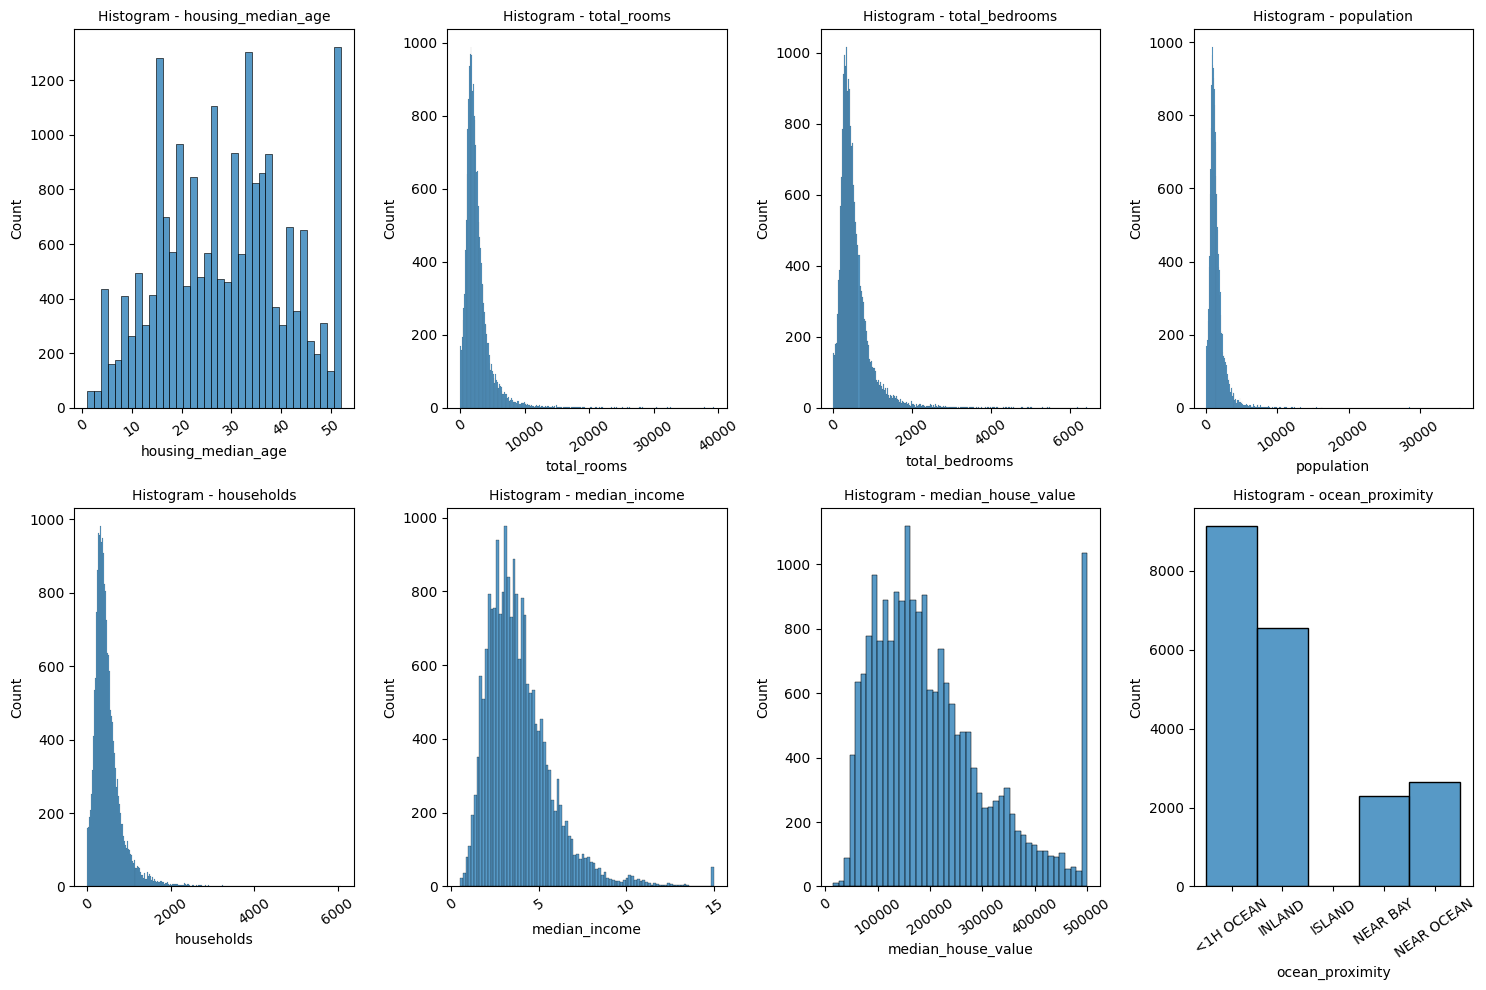

In [10]:
columns_taken = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
for i, columns in enumerate(columns_taken):
    row = i // 4
    col = i % 4
    sns.histplot(x=columns, data=c, ax=ax[row, col])
    ax[row, col].set_title(f'Histogram - {columns}', fontsize=10)
    ax[row, col].tick_params(axis='x', rotation=35)

plt.tight_layout()
plt.show()


Data processing

In [11]:
# Calculate the mean of the 'total_bedrooms' column
mean_total_bedrooms = c['total_bedrooms'].mean()

# Replace missing values in 'total_bedrooms' with the mean
c['total_bedrooms'].fillna(mean_total_bedrooms, inplace=True)

c.head(22)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,price_category
0,41,880,129.0,322,126,8.3252,452600,NEAR BAY,premium
1,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,premium
2,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,premium
3,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,premium
4,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,premium
5,52,919,213.0,413,193,4.0368,269700,NEAR BAY,premium
6,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY,premium
7,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY,premium
8,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY,premium
9,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY,premium


In [12]:
train, valid, test = np.split(c.sample(frac = 1),  [int(0.6*len(c)), int(0.8*len(c))])

C:\Users\weroc\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [13]:
def scale_c(a_random_df, oversample = False):
    x = a_random_df[a_random_df.columns[:-2]].values
    y = a_random_df[a_random_df.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x,y = ros.fit_resample(x,y)
    data = np.hstack((x, np.reshape(y, (-1, 1))))
    return data, x, y

In [14]:
train.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,price_category
10273,19,1591,279.0,891,237,5.6573,216000,<1H OCEAN,premium
12405,9,1961,595.0,966,275,3.8125,96700,INLAND,affordable
8335,40,1917,438.0,1021,383,2.2448,175000,<1H OCEAN,average
20114,25,2505,529.0,1145,483,2.0060,103000,INLAND,affordable
14016,23,2474,594.0,1107,536,2.9705,245500,NEAR OCEAN,premium


In [15]:
print(type(train))

<class 'pandas.core.frame.DataFrame'>


In [16]:
train,x_train,y_train = scale_c(train, oversample = True)
valid,x_valid,y_valid = scale_c(valid, oversample = False)
test,x_test,y_test = scale_c(test, oversample = False)

In [17]:
print(type(train))

<class 'numpy.ndarray'>


**Clustering using kNN**

In [18]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [19]:
y_pred = model_knn.predict(x_test)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  affordable       0.97      0.89      0.93      1528
     average       0.74      0.92      0.82       872
     premium       0.98      0.93      0.96      1728

    accuracy                           0.92      4128
   macro avg       0.90      0.91      0.90      4128
weighted avg       0.93      0.92      0.92      4128



**Assign the Labels to the dataframe**

In [22]:
# Convert test_data_with_labels array into a DataFrame
test_data_with_labels = pd.DataFrame(data=x_test)

# Add the predicted labels to the DataFrame
test_data_with_labels['predicted_label'] = y_pred

# Now you can inspect the test data along with the predicted labels
print(test_data_with_labels.head())

          0         1         2         3         4         5         6  \
0  1.068525 -0.515234 -0.212749  0.227900 -0.189191 -0.367374 -0.564703   
1  1.860252 -0.542886 -0.792569 -0.745795 -0.721335  1.026169  0.905052   
2  0.751834 -0.308528 -0.480177 -0.572594 -0.416515 -0.030532 -0.949222   
3  0.118452 -0.358391  0.520900  1.041856  0.810516 -0.977134  0.058936   
4 -1.069138  0.990185  0.660530  1.223133  0.820849  0.558443 -0.222227   

  predicted_label  
0         average  
1         premium  
2      affordable  
3         average  
4         average  


In [23]:
test_data_with_labels

,0,1,2,3,4,5,6,predicted_label
0,1.068525,-0.515234,-0.212749,0.227900,-0.189191,-0.367374,-0.564703,average
1,1.860252,-0.542886,-0.792569,-0.745795,-0.721335,1.026169,0.905052,premium
2,0.751834,-0.308528,-0.480177,-0.572594,-0.416515,-0.030532,-0.949222,affordable
3,0.118452,-0.358391,0.520900,1.041856,0.810516,-0.977134,0.058936,average
4,-1.069138,0.990185,0.660530,1.223133,0.820849,0.558443,-0.222227,average
...,...,...,...,...,...,...,...,...
4123,1.306043,-0.575070,-0.596140,-0.819383,-0.661921,-1.402715,-1.172576,affordable
4124,1.385215,-0.708795,-0.283748,0.068160,-0.339018,-0.907085,-0.433319,average
4125,1.860252,-0.344792,-0.499109,-0.429905,-0.527593,-0.023517,0.414550,premium
4126,-0.910793,0.057741,0.241640,-0.525031,-0.413932,0.120612,0.340974,premium


In [24]:
# Convert the DataFrame with clusters to a CSV file
test_data_with_labels.to_csv('California housing_kNN_with predicted_labels.csv', index=False)

**Train and test on Other Machine Learning Models**

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [27]:
y_pred = model_knn.predict(x_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  affordable       0.97      0.89      0.93      1528
     average       0.74      0.92      0.82       872
     premium       0.98      0.93      0.96      1728

    accuracy                           0.92      4128
   macro avg       0.90      0.91      0.90      4128
weighted avg       0.93      0.92      0.92      4128



In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model_logisticregression = LogisticRegression()
model_lr = model_logisticregression.fit(x_train, y_train)


In [31]:
y_pred = model_knn.predict(x_test)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  affordable       0.97      0.89      0.93      1528
     average       0.74      0.92      0.82       872
     premium       0.98      0.93      0.96      1728

    accuracy                           0.92      4128
   macro avg       0.90      0.91      0.90      4128
weighted avg       0.93      0.92      0.92      4128



In [34]:
from sklearn.svm import SVC

In [35]:
model_svm = SVC()
model_svm = model_svm.fit(x_train, y_train)

In [36]:
y_pred = model_svm.predict(x_test)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  affordable       1.00      0.96      0.98      1528
     average       0.89      1.00      0.94       872
     premium       1.00      0.97      0.99      1728

    accuracy                           0.97      4128
   macro avg       0.96      0.98      0.97      4128
weighted avg       0.98      0.97      0.97      4128



In [79]:
# Define the new attributes for prediction
new_data = [[0.209689, -0.692206, -0.597162, 0.187400, -0.524581, -0.811908, -0.423284]]

# Use the trained SVM model to predict the label for the new data
predicted_label = model_svm.predict(new_data)

# Display the predicted label
print("Predicted Label:", predicted_label)


Predicted Label: ['average']


**Thank You**